<a href="https://colab.research.google.com/github/tvr430/Netflix/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/netflix-rotten-tomatoes-metacritic-imdb.csv')
df.drop(['Image', 'Poster', 'TMDb Trailer','Trailer Site','Netflix Link', 'IMDb Link'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  15480 non-null  object 
 1   Genre                  13770 non-null  object 
 2   Tags                   15413 non-null  object 
 3   Languages              13545 non-null  object 
 4   Series or Movie        15480 non-null  object 
 5   Hidden Gem Score       13379 non-null  float64
 6   Country Availability   15461 non-null  object 
 7   Runtime                15479 non-null  object 
 8   Director               10772 non-null  object 
 9   Writer                 11150 non-null  object 
 10  Actors                 13555 non-null  object 
 11  View Rating            8456 non-null   object 
 12  IMDb Score             13381 non-null  float64
 13  Rotten Tomatoes Score  6382 non-null   float64
 14  Metacritic Score       4336 non-null   float64
 15  Aw

In [3]:
df['Boxoffice']=df['Boxoffice'].replace('[$,]','',regex = True).astype(float)
df['Boxoffice']

0        2122065.0
1          70632.0
2          16263.0
3              NaN
4              NaN
           ...    
15475          NaN
15476          NaN
15477          NaN
15478          NaN
15479          NaN
Name: Boxoffice, Length: 15480, dtype: float64

In [4]:
score=[col for col in df if 'Score' in col]
score.extend(['Title','Boxoffice'])
df_score=df[score]
df_score=df_score.dropna(subset=['Boxoffice'])
df_score.sort_values(['Boxoffice'],ascending=False)

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Title,Boxoffice
13703,4.0,7.8,89.0,75.0,Titanic,659363944.0
10593,3.3,7.0,70.0,59.0,Jurassic World,652385625.0
14202,4.0,8.0,91.0,69.0,Avengers Assemble,623357910.0
14478,4.5,9.0,94.0,84.0,The Dark Knight,534858444.0
1591,2.8,6.5,52.0,51.0,Im Thinking of Ending Things,474544677.0
...,...,...,...,...,...,...
5363,4.5,7.8,93.0,97.0,Jules and Jim,509.0
3445,5.6,7.5,89.0,78.0,The Soft Skin,509.0
7012,2.0,5.8,22.0,NaN,2:22,422.0
5862,6.3,3.6,NaN,NaN,Realms,147.0


In [5]:
df_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4007 entries, 0 to 15465
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Hidden Gem Score       4007 non-null   float64
 1   IMDb Score             4007 non-null   float64
 2   Rotten Tomatoes Score  3728 non-null   float64
 3   Metacritic Score       3525 non-null   float64
 4   Title                  4007 non-null   object 
 5   Boxoffice              4007 non-null   float64
dtypes: float64(5), object(1)
memory usage: 219.1+ KB


In [6]:
dfm=df[df['Series or Movie']=='Movie'].reset_index(drop=True)
dfs=df[df['Series or Movie']=='Series'].reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


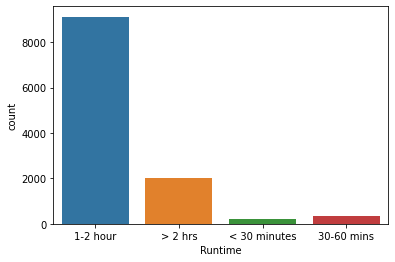

In [7]:
sns.countplot(dfm['Runtime'])

In [8]:
def cc(col,a=10,b=False):
#     this function takes a column as input and outputs a bargraph that gives the count of top 10 occurances
    col=col.dropna()
    l=[]
    for i in col:
        if type(i)==str:
            l.extend(i.replace(' ','').split(','))
    d={}
    for i in l:
        if i in d:
            d[i]+=1
        else:
            d[i]=1
    df=pd.DataFrame(d.values(),index=d.keys())
    df=df.sort_values(0, ascending=b)
    x=sns.barplot(x=df.index[0:a],y=df[0][0:a])
    return x

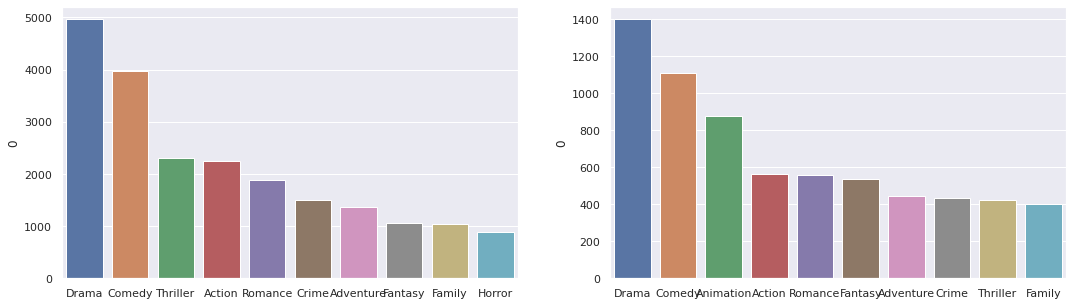

In [9]:
sns.set(rc={'figure.figsize':(18,5)})
plt.subplot(1,2,1)
cc(dfm.Genre)
plt.subplot(1,2,2)
cc(dfs.Genre)

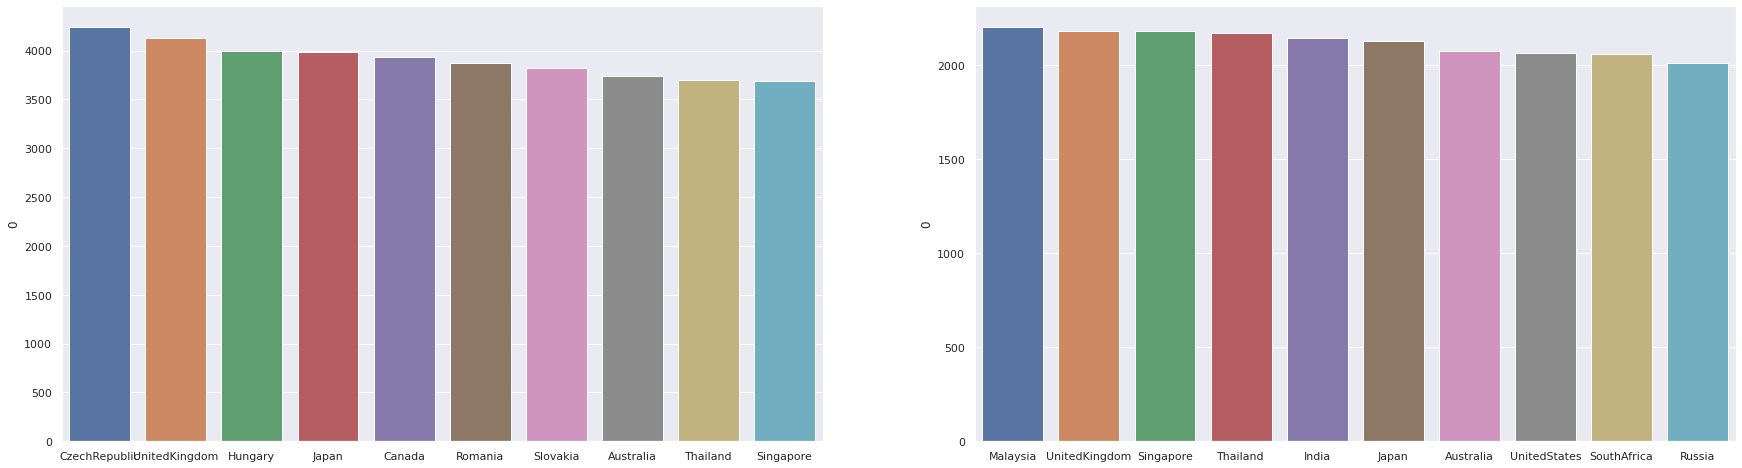

In [10]:
sns.set(rc={'figure.figsize':(30,8)})
plt.subplot(1,2,1)
cc(dfm['Country Availability'])
plt.subplot(1,2,2)
cc(dfs['Country Availability'])

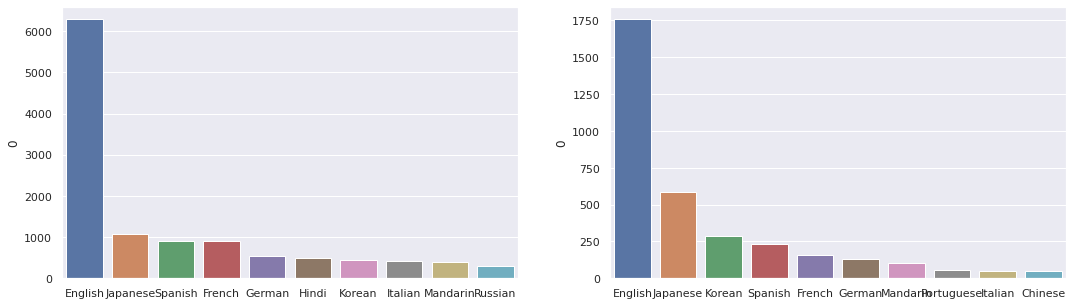

In [11]:
sns.set(rc={'figure.figsize':(18,5)})
plt.subplot(1,2,1)
cc(dfm['Languages'])
plt.subplot(1,2,2)
cc(dfs['Languages'])

### Best performing Directors of all time and all genres by boxoffice collection

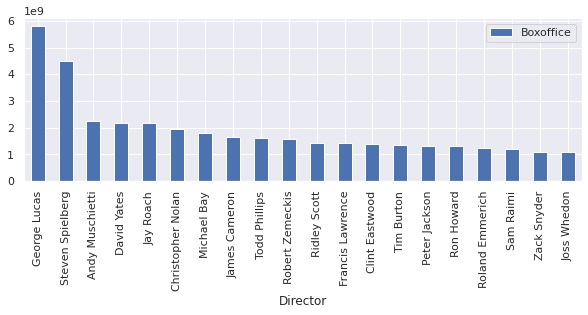

In [12]:
sns.set(rc={'figure.figsize':(10,3)})
df2=df[['Director','Boxoffice']].groupby(['Director']).sum('Boxoffice')
df2=df2.sort_values('Boxoffice',ascending=False)
df2[0:20].plot(kind='bar')

### Most Popular tags

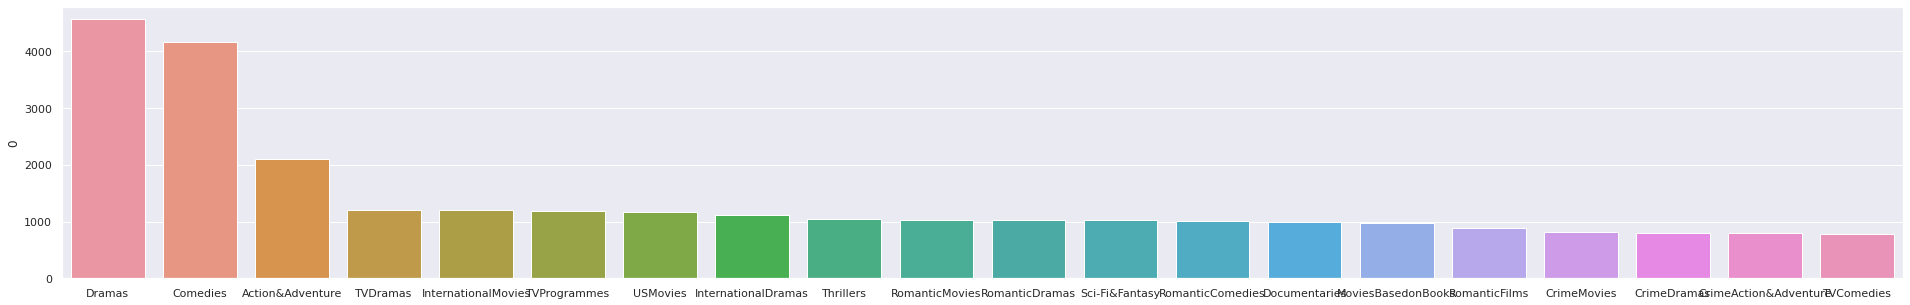

In [13]:
sns.set(rc={'figure.figsize':(33,5)})
cc(df['Tags'],20)

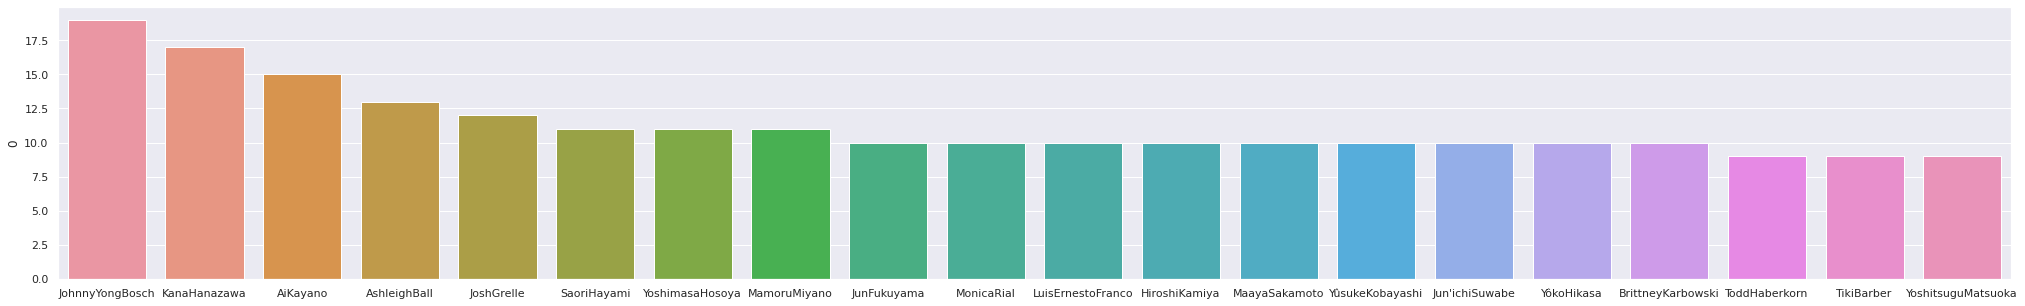

In [14]:
sns.set(rc={'figure.figsize':(35,5)})
cc(dfs['Actors'],20)

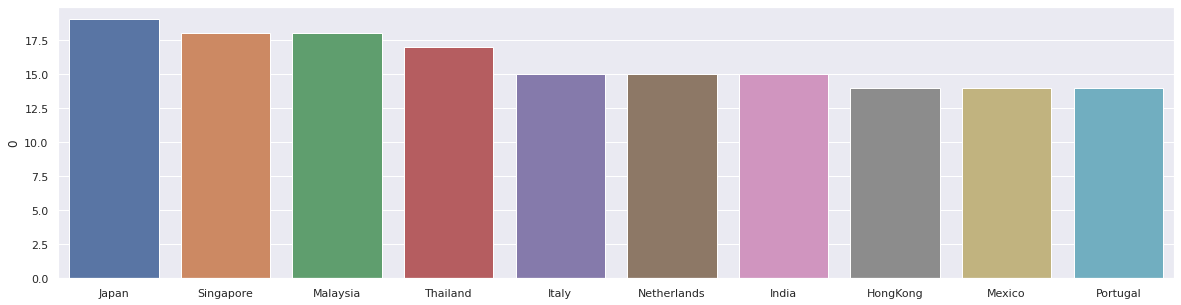

In [15]:
pl=[]
for i in range(len(df)):
    if type(df.Actors[i])==str:
        if 'Johnny Yong Bosch' in df.Actors[i]:
            pl.append(i)
sns.set(rc={'figure.figsize':(20,5)})
cc(df.iloc[pl]['Country Availability'])

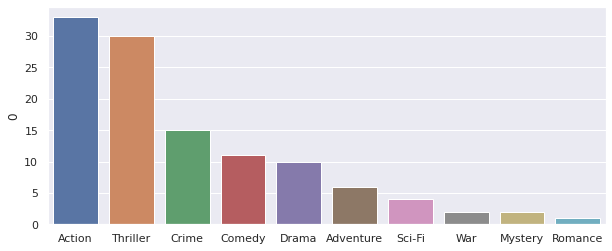

In [16]:
pl=[]
for i in range(len(dfm)):
    if type(dfm.Actors[i])==str:
        if 'Bruce Willis' in dfm.Actors[i]:
            pl.append(i)
sns.set(rc={'figure.figsize':(10,4)})
cc(dfm.iloc[pl]['Genre'])

In [17]:
def countgenre(col):
    col=col.dropna()
    l=[]
    for i in col:
        if type(i)==str:
            l.extend(i.replace(' ','').split(','))
    d=[]
    for i in l:
        if i not in d:
            d.append(i)
    return d

In [18]:
df['Boxoffice']=df['Boxoffice'].fillna(0)
List_of_Genre=countgenre(df.Genre)
collection={}
for j in List_of_Genre:
    sum1=0
    for i in range(len(df)):
        if (type(df['Genre'][i])==str):
            if j in df['Genre'][i]:
                sum1=sum1+df['Boxoffice'][i]
    collection[j]=sum1
dfc=pd.DataFrame(collection.values(),index=collection.keys(),columns=['Collection'])
dfc=dfc.sort_values('Collection',ascending=False)
z=10
px.bar(dfc[0:z],x=dfc.index[0:z],y='Collection', text='Collection')

In [19]:
def split_n_aggr(df,feature_to_group,common_feature):
    l=[]
    for i in feature_to_group:
        if type(i)==str:
            l.extend(i.replace(' ','').split(','))
    d=[]
    for i in l:
        if i not in d:
            d.append(i)
    collection={}
    for j in d:
        sum1=0
        for i in range(len(df)):
            if type(feature_to_group[i])==str:
                if j in feature_to_group[i]:
                    sum1=sum1+common_feature[i]
        collection[j]=sum1
    return collection

In [20]:
a=df['Production House']
b=df['Boxoffice']
collection1=split_n_aggr(df,a,b)

In [21]:
dfph=pd.DataFrame(collection1.values(),index=collection1.keys(),columns=['Production House'])
dfph.drop(['Film','Ltd.','Inc.','The'],inplace=True)
dfph=dfph.sort_values('Production House',ascending=False)
z=10
px.bar(dfph[0:z],x=dfph.index[0:z],y='Production House', text='Production House')